In [ ]:
# INF2178 Assignment_1
# Name: Jingwen Ji
# ID: 1006128101

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Upload data from Google Colab
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Show the head of the dataset
print(df.head())


Saving INF2178_A1_data.xlsx to INF2178_A1_data (4).xlsx
  OCCUPANCY_DATE         ORGANIZATION_NAME  PROGRAM_ID  \
0     2021-01-01  COSTI Immigrant Services       15371   
1     2021-01-01  COSTI Immigrant Services       16211   
2     2021-01-01  COSTI Immigrant Services       16192   
3     2021-01-01  COSTI Immigrant Services       16191   
4     2021-01-01  COSTI Immigrant Services       16193   

                                        PROGRAM_NAME       SECTOR  \
0       COSTI North York West Hotel - Family Program     Families   
1      COSTI North York West Hotel - Seniors Program  Mixed Adult   
2          COSTI North York West Hotel Program - Men          Men   
3  COSTI North York West Hotel Program - Mixed Adult  Mixed Adult   
4        COSTI North York West Hotel Program - Women        Women   

  PROGRAM_MODEL OVERNIGHT_SERVICE_TYPE       PROGRAM_AREA  SERVICE_USER_COUNT  \
0     Emergency    Motel/Hotel Shelter  COVID-19 Response                  74   
1     Emergency   

In [ ]:
# Check for missing values in the relevant columns
missing_values = df[['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED',
                     'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']].isnull().sum()

missing_values


CAPACITY_TYPE               0
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
dtype: int64

In [ ]:
statistics = df[['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS',
                 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']].describe()

statistics


,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


In [ ]:
# Generate the summary of descriptive statistics
def get_summary_statistics(dataset):

    # Calculate summary statistics
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    iqr = np.round(quartile_3 - quartile_1, 2)

    # Print the summary statistics
    print('Min:', min_value)
    print('Mean:', mean)
    print('Max:', max_value)
    print('25th percentile:', quartile_1)
    print('Median:', median)
    print('75th percentile:', quartile_3)
    print('Interquartile range (IQR):', iqr)


In [ ]:
print('\n\nCAPACITY_ACTUAL_BED')
get_summary_statistics(df['CAPACITY_ACTUAL_BED'])



CAPACITY_ACTUAL_BED
Min: 1.0
Mean: 31.63
Max: 234.0
25th percentile: 15.0
Median: nan
75th percentile: 43.0
Interquartile range (IQR): 28.0


In [ ]:
print('\n\nOCCUPIED_BEDS')
get_summary_statistics(df['OCCUPIED_BEDS'])



OCCUPIED_BEDS
Min: 1.0
Mean: 29.78
Max: 234.0
25th percentile: 14.0
Median: nan
75th percentile: 41.0
Interquartile range (IQR): 27.0


In [ ]:
print('\n\nCAPACITY_ACTUAL_ROOM')
get_summary_statistics(df['CAPACITY_ACTUAL_ROOM'])



CAPACITY_ACTUAL_ROOM
Min: 1.0
Mean: 55.55
Max: 268.0
25th percentile: 19.0
Median: nan
75th percentile: 68.0
Interquartile range (IQR): 49.0


In [ ]:
print('\n\nOCCUPIED_ROOMS')
get_summary_statistics(df['OCCUPIED_ROOMS'])



OCCUPIED_ROOMS
Min: 1.0
Mean: 52.8
Max: 268.0
25th percentile: 16.0
Median: nan
75th percentile: 66.0
Interquartile range (IQR): 50.0


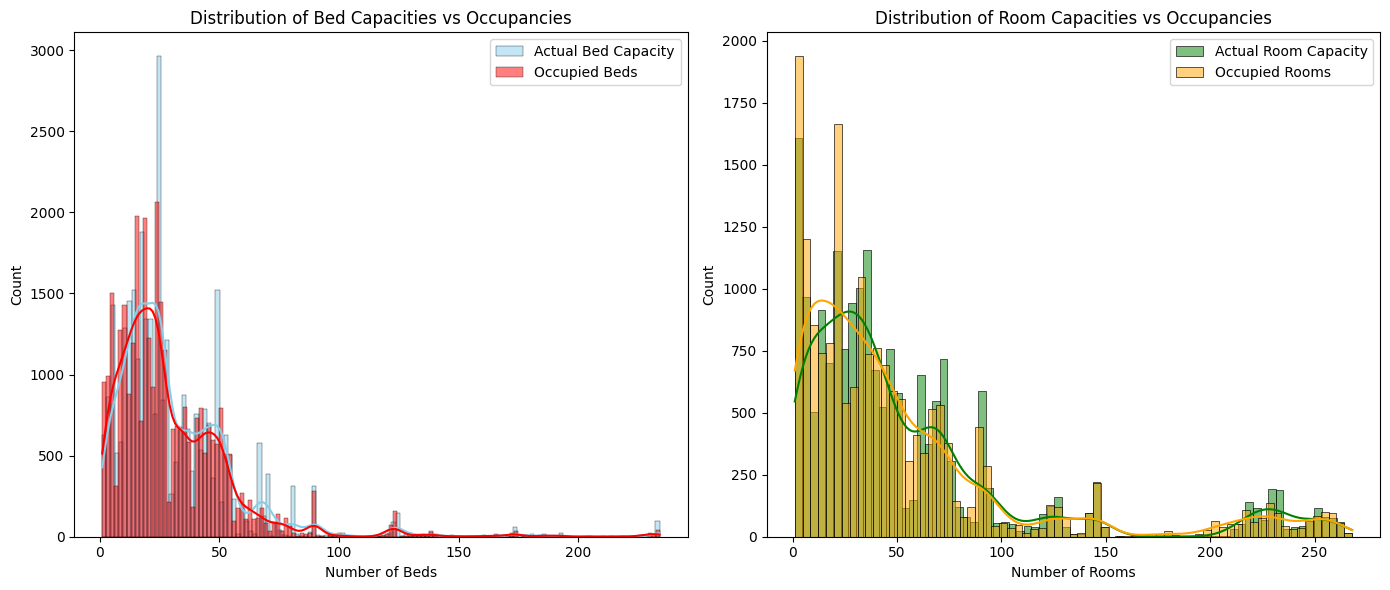

In [ ]:
# Plotting the distribution of bed and room capacities and occupancies
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Create a subplot grid of 1 row and 2 columns, and start plotting in the first cell
sns.histplot(df['CAPACITY_ACTUAL_BED'], kde=True, color='skyblue', label='Actual Bed Capacity')
sns.histplot(df['OCCUPIED_BEDS'], kde=True, color='red', label='Occupied Beds') # Histogram for occupied beds with a KDE curve
plt.title('Distribution of Bed Capacities vs Occupancies')
plt.xlabel('Number of Beds')
plt.legend() # Display the legend to identify the two histograms

plt.subplot(1, 2, 2) # Move to the second cell of the subplot grid
sns.histplot(df['CAPACITY_ACTUAL_ROOM'], kde=True, color='green', label='Actual Room Capacity')
sns.histplot(df['OCCUPIED_ROOMS'], kde=True, color='orange', label='Occupied Rooms') # Histogram for occupied rooms with a KDE curve
plt.title('Distribution of Room Capacities vs Occupancies')
plt.xlabel('Number of Rooms')
plt.legend() # Display the legend to identify the two histograms

# Adjust the subplots to fit into the figure area
plt.tight_layout()
plt.show()


In [ ]:
# Calculating occupancy rates
df['BED_OCCUPANCY_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']
df['ROOM_OCCUPANCY_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

# Replace infinities with NaN if there's division by zero
df.replace([np.inf, -np.inf], np.nan, inplace=True)


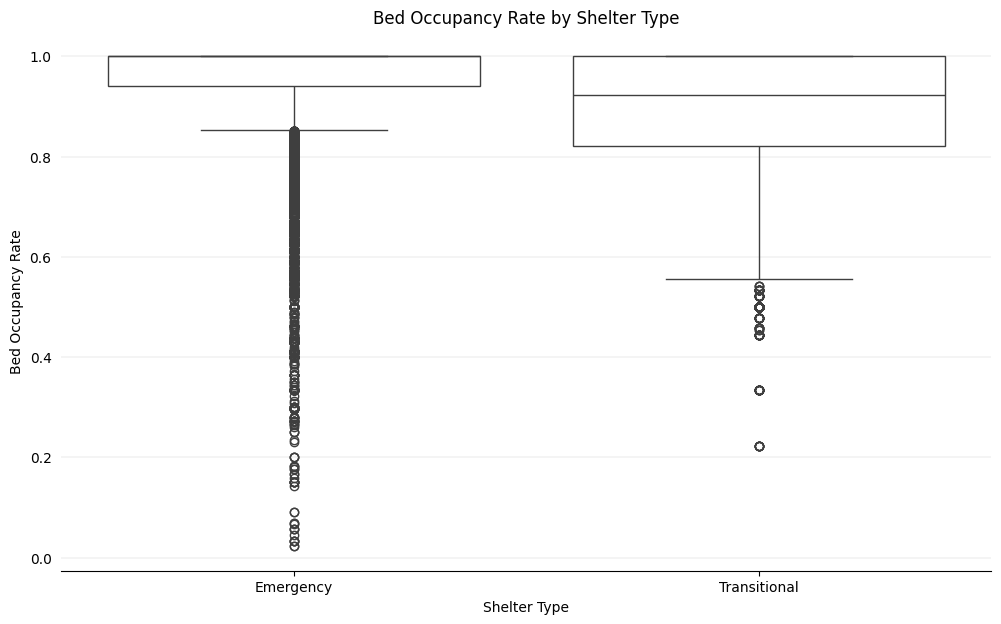

In [ ]:
# Create a figure for bed occupancy rate boxplots
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title and labels
ax.set_title('Bed Occupancy Rate by Shelter Type')
ax.set_xlabel('Shelter Type')
ax.set_ylabel('Bed Occupancy Rate')

# Plot the boxplot for bed occupancy rates
sns.boxplot(x='PROGRAM_MODEL', y='BED_OCCUPANCY_RATE', data=df, ax=ax,
            boxprops=dict(facecolor='None'))

plt.show()


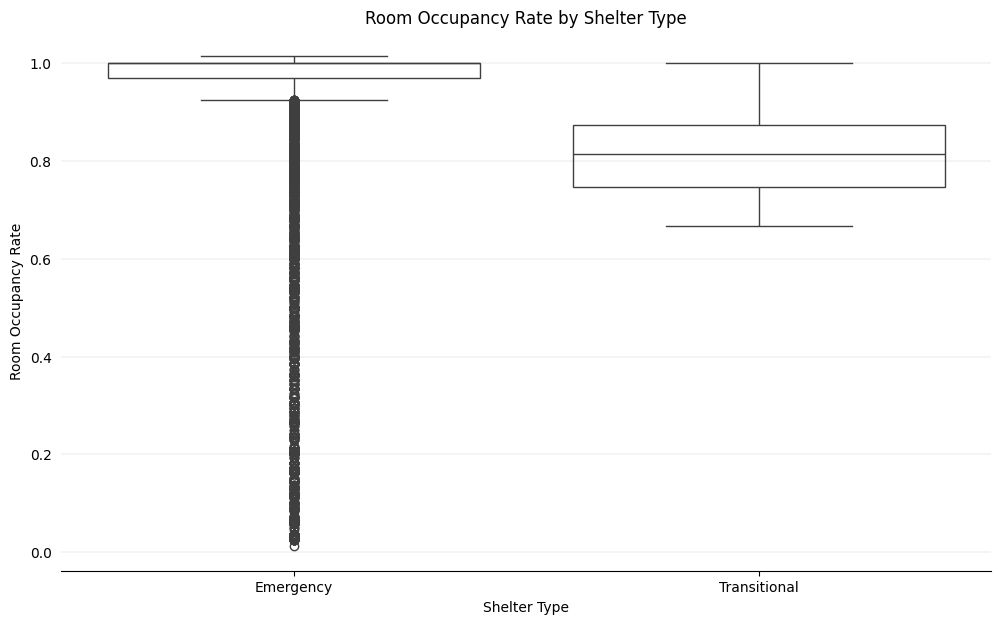

In [ ]:
# Create a figure for room occupancy rate boxplots
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title and labels
ax.set_title('Room Occupancy Rate by Shelter Type')
ax.set_xlabel('Shelter Type')
ax.set_ylabel('Room Occupancy Rate')

# Plot the boxplot for room occupancy rates
sns.boxplot(x='PROGRAM_MODEL', y='ROOM_OCCUPANCY_RATE', data=df, ax=ax,
            boxprops=dict(facecolor='None'))

plt.show()


In [ ]:
# Filter the data for Transitional and Emergency shelters for both bed and room occupancy rates
transitional_bed_occupancy = df[df['PROGRAM_MODEL'] == 'Transitional']['BED_OCCUPANCY_RATE'].dropna()
emergency_bed_occupancy = df[df['PROGRAM_MODEL'] == 'Emergency']['BED_OCCUPANCY_RATE'].dropna()

transitional_room_occupancy = df[df['PROGRAM_MODEL'] == 'Transitional']['ROOM_OCCUPANCY_RATE'].dropna()
emergency_room_occupancy = df[df['PROGRAM_MODEL'] == 'Emergency']['ROOM_OCCUPANCY_RATE'].dropna()

# Perform Welch's t-test for bed occupancy rates between Transitional and Emergency
t_stat_bed, p_val_bed = stats.ttest_ind(transitional_bed_occupancy, emergency_bed_occupancy, equal_var=False)
print("Welch's t-test for Bed Occupancy Rate:")
print(f"Transitional vs. Emergency: t-stat = {t_stat_bed}, p-value = {p_val_bed}")

# Perform Welch's t-test for room occupancy rates between Transitional and Emergency
t_stat_room, p_val_room = stats.ttest_ind(transitional_room_occupancy, emergency_room_occupancy, equal_var=False)
print("\nWelch's t-test for Room Occupancy Rate:")
print(f"Transitional vs. Emergency: t-stat = {t_stat_room}, p-value = {p_val_room}")


Welch's t-test for Bed Occupancy Rate:
Transitional vs. Emergency: t-stat = -36.78483679745313, p-value = 7.273950955976339e-283

Welch's t-test for Room Occupancy Rate:
Transitional vs. Emergency: t-stat = -31.71080126309493, p-value = 4.4252019739840735e-150
